In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
vehicles = pd.read_csv("../dataset/vehicles.csv",usecols=["Num_Acc", "num_veh","catv"],
    sep=",",
    encoding="utf-8")

In [3]:
vehicles.shape

(1433389, 3)

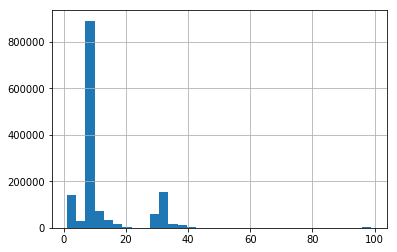

In [5]:
vehicles['catv'].hist(bins=33)

In [6]:
vehicles['catv'].describe()

count    1.433389e+06
mean     1.150995e+01
std      1.126572e+01
min      1.000000e+00
25%      7.000000e+00
50%      7.000000e+00
75%      1.000000e+01
max      9.900000e+01
Name: catv, dtype: float64

In [7]:
vehicles.Num_Acc.unique().shape

(839985,)

In [8]:
catv_sem_descricao = [vehicles['catv']>13]
catv_sem_descricao

[0          False
 1          False
 2          False
 3          False
 4           True
 5          False
 6           True
 7          False
 8          False
 9           True
 10         False
 11         False
 12         False
 13         False
 14          True
 15         False
 16         False
 17          True
 18         False
 19          True
 20          True
 21         False
 22         False
 23         False
 24         False
 25         False
 26         False
 27          True
 28         False
 29         False
            ...  
 1433359    False
 1433360    False
 1433361    False
 1433362    False
 1433363    False
 1433364    False
 1433365    False
 1433366    False
 1433367    False
 1433368    False
 1433369    False
 1433370    False
 1433371    False
 1433372    False
 1433373    False
 1433374    False
 1433375    False
 1433376    False
 1433377    False
 1433378    False
 1433379    False
 1433380    False
 1433381    False
 1433382    False
 1433383  

In [9]:
sum(sum(catv_sem_descricao))

294818

In [10]:
vehicles.catv.unique().shape

(33,)

In [11]:
vehicles.num_veh.unique().shape

(132,)

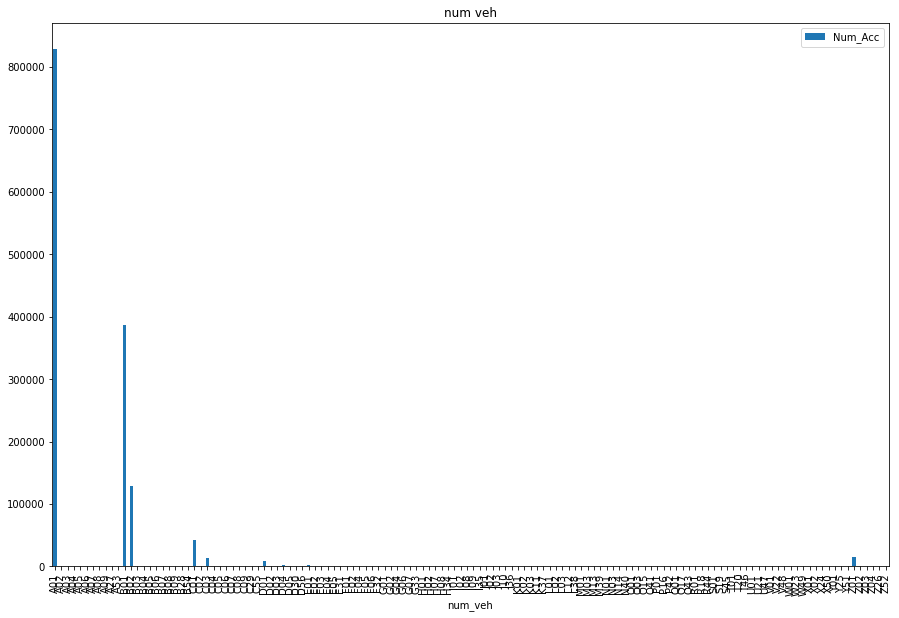

In [12]:
vehicles.groupby('num_veh').count()[['Num_Acc']].plot(kind='bar', title ="num veh",figsize=(15,10),legend=True)

In [13]:
users = pd.read_csv('../dataset/users.csv',low_memory=False, sep=',', encoding='utf-8')

In [14]:
len(users.num_veh.unique())

129

In [58]:
vehicles.groupby('Num_Acc').count().groupby('catv').count()

,num_veh
catv,
1,319280
2,464031
3,45462
4,8395
5,1929
6,522
7,173
8,90
9,32


In [59]:
vehicles.head()

,Num_Acc,catv,num_veh
0,201600000001,7,B02
1,201600000001,2,A01
2,201600000002,7,A01
3,201600000003,7,A01
4,201600000004,32,B02


In [60]:
y = vehicles.groupby('Num_Acc').count()

In [62]:
y


,catv,num_veh
Num_Acc,,
200500000001,2,2
200500000002,2,2
200500000003,2,2
200500000004,3,3
200500000005,1,1
200500000006,1,1
200500000007,2,2
200500000008,1,1
200500000009,2,2


In [34]:
x =y['catv'].values

In [37]:
x

array([2, 2, 2, ..., 2, 2, 2])

In [43]:
z = vehicles['Num_Acc'].unique()

In [64]:
z.sort()

In [65]:
z


array([200500000001, 200500000002, 200500000003, ..., 201600059430,
       201600059431, 201600059432])

In [66]:
new_veh= pd.DataFrame({'Num_Acc':z,'count_veh':x})

In [67]:
new_veh.head()

,Num_Acc,count_veh
0,200500000001,2
1,200500000002,2
2,200500000003,2
3,200500000004,3
4,200500000005,1


In [112]:
vehi_sorted = vehicles.sort_values('Num_Acc')[['Num_Acc','catv']]

In [113]:
len(vehi_sorted.iloc[1:4]['catv'].unique())

2

In [114]:
ind = 0
is_veh_eq = []
for i in range(len(x)):
    if len(vehi_sorted.iloc[ind:ind+x[i]]['catv'].unique()) == 1:
        is_veh_eq.append(0)
    else:
        is_veh_eq.append(1)
    ind = ind + x[i]

In [119]:
is_veh_eq


[0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,


In [116]:
vehi_sorted


,Num_Acc,catv
1283625,200500000001,7
1283626,200500000001,7
1283628,200500000002,2
1283627,200500000002,7
1283630,200500000003,2
1283629,200500000003,2
1283632,200500000004,7
1283631,200500000004,7
1283633,200500000004,7
1283634,200500000005,7


In [120]:
dif_cat = np.asarray(is_veh_eq)

In [121]:
vehicles_done= pd.DataFrame({'Num_Acc':z,'count_veh':x, 'diff_cat':dif_cat})

In [123]:
vehicles_done.to_csv('Vehicles_done.csv', sep=',')

In [124]:
vehicles_done.describe()

,Num_Acc,count_veh,diff_cat
count,8.399850e+05,839985.000000,839985.000000
mean,2.010011e+11,1.706446,0.415759
std,3.458009e+08,0.671987,0.492853
min,2.005000e+11,1.000000,0.000000
25%,2.007000e+11,1.000000,0.000000
50%,2.010000e+11,2.000000,0.000000
75%,2.013000e+11,2.000000,1.000000
max,2.016001e+11,56.000000,1.000000


In [142]:
vehicles_done.groupby('diff_cat').count()

,Num_Acc,count_veh
diff_cat,,
0,490754,490754
1,349231,349231


In [143]:
vehicles_done.groupby('count_veh').count()

,Num_Acc,diff_cat
count_veh,,
1,319280,319280
2,464031,464031
3,45462,45462
4,8395,8395
5,1929,1929
6,522,522
7,173,173
8,90,90
9,32,32


### Apenas 20% (171.474) dos acidentes foram entre veículos do mesmo tipo.
### 42% (349.231) entre veículos diferentes
### 38% (319.280) com apenas um veículo